<a href="https://colab.research.google.com/github/ksknysn/BuyingCar/blob/main/passat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#you should crawl webpages or download(i downloaded)
with open("/content/sample_data/passat.html") as fp:
  soup = BeautifulSoup(fp, "html.parser")

In [4]:
#start to scrap the webpage
table1 = soup.find_all("tr",class_="searchResultsItem")
#fill an numpy array with car features
veri2 = np.empty(shape=(1,6),dtype='<U4')

In [5]:
#scrapping html table
for row in table1:
    #foto = row.find("td",class_="searchResultsLargeThumbnail")
    #model = row.find("td", class_="searchResultsTagAttributeValue")
    #ilan = row.find("td", class_="searchResultsTitleValue
    
    try:
        foto = row.find("td",class_="searchResultsLargeThumbnail")

        ozellikler1 = row.find_all("td",class_="searchResultsTagAttributeValue")
        marka = re.split("\n", ozellikler1[0].text)[1].replace(' ','')
        seri = re.split("\n", ozellikler1[1].text)[1].replace(' ','')
        model = re.split("\n", ozellikler1[2].text)[1].replace(' ','')

        ilan = row.find("td",class_="searchResultsTitleValue").text
        ilan = re.split("\n", ilan)

        
        #model = re.split("\n",model)[1].replace(' ','')
        #ilan = row.find("td",class_="searchResultsTitleValue").text.encode("utf-8")
        

        ozellikler2 = row.find_all("td",class_="searchResultsAttributeValue")
        yil = int(re.split("\n",ozellikler2[0].text)[1].replace(' ',''))
        km = int(re.split("\n",ozellikler2[1].text)[1][:-4].replace(' ',''))

        
        fiyat = row.find("td", class_="searchResultsPriceValue").text
        fiyat = int(re.split("\n", fiyat)[1][:-7].replace('.',''))
        
    except:
        None

    
    e = np.array([[marka, seri, model, yil, km, fiyat]])
    c = np.vstack((veri2, e))
    veri2 = c

In [6]:
#filled array list, we will create a pandas dataframe with this list
veri2

array([['', '', '', '', '', ''],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionHighline', '2016',
        '105', '607'],
       ['Volkswagen', 'Passat', '2.0TDIBlueMotionHighline', '2013',
        '192', '422'],
       ['Volkswagen', 'Golf', '1.4TSIHighline', '2013', '135', '405'],
       ['Volkswagen', 'Golf', '1.4TSIHighline', '2013', '135', '405'],
       ['Volkswagen', 'Polo', '1.2TSIComfortline', '2017', '42', '297'],
       ['Volkswagen', 'VWCC', '2.0TDI', '2012', '169', '298'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionTrendline', '2017',
        '120', '437'],
       ['Volkswagen', 'Passat', '1.6Exclusive', '2005', '176', '136'],
       ['Volkswagen', 'Passat', '1.4TSIBlueMotionComfortline', '2017',
        '33', '605'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionRLine', '2017', '108',
        '642'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionComfortline', '2015',
        '172', '510'],
       ['Volkswagen', 'Passat', '1.6TDIBlueMotionHighline', '2017',
 

In [7]:
#remove the first row while we added to creat numpy list
veri2 = np.delete(veri2,0,0)
#create pandas dataframe
df = pd.DataFrame(veri2,columns=('marka','seri', 'model','yil','km','fiyat'))
#convert to int some features to analyze
df = df.astype({'yil':int, 'km':int, 'fiyat':int})

In [8]:
df.size

126

In [11]:
#filter just passat serial
Passat = df.loc[df['seri'] == 'Passat']

In [12]:
Passat.head()

,marka,seri,model,yil,km,fiyat
0,Volkswagen,Passat,1.6TDIBlueMotionHighline,2016,105,607
1,Volkswagen,Passat,2.0TDIBlueMotionHighline,2013,192,422
6,Volkswagen,Passat,1.6TDIBlueMotionTrendline,2017,120,437
7,Volkswagen,Passat,1.6Exclusive,2005,176,136
8,Volkswagen,Passat,1.4TSIBlueMotionComfortline,2017,33,605


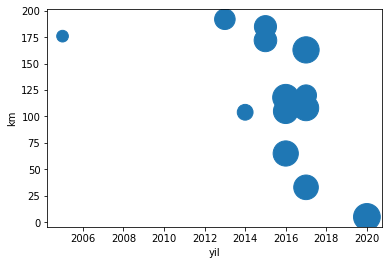

In [13]:
#i choose the scatter plot
Passat.plot.scatter(x='yil',y='km',s='fiyat')

conclusion: you an see a car that is the second lowest price while its model is newer than two car and its km is lower than more than 7 cars. so you can choose that car to buy after looking other qualifications(like accidents etc.)

In [17]:
print(Passat.loc[Passat['yil']==2013])
print(Passat.loc[Passat['yil']==2014])

        marka    seri                     model   yil   km  fiyat
1  Volkswagen  Passat  2.0TDIBlueMotionHighline  2013  192    422
         marka    seri                        model   yil   km  fiyat
16  Volkswagen  Passat  1.4TSIBlueMotionComfortline  2014  104    249


First car is 2013, 192 km and 422k but the second one is 2014, 104 km and 249k. So, we should choose the second one. shouldn't we?